# Data Science III
## Comisión 95480

Alumna: Daniela González Padilla



---


Objetivo: el proyecto busca aplicar técnicas de Deep Learning con PyTorch al análisis del texto de Pride and Prejudice, de Jane Austen, construyendo y comparando redes neuronales simples y multicapa, y mostrando cómo las funciones de activación y optimización influyen en el aprendizaje automático aplicado al lenguaje natural.


---



## Sub objetivos


1. Contar cuántas veces se menciona cada personaje o palabra importante.
2. Encontrar las palabras más frecuentes de la época
3. Limpiar el texto para luego hacer gráficos y comparaciones.






## 1.1 CARGA DE DATOS

In [36]:
import nltk
from nltk.tokenize import word_tokenize
import requests
import spacy
import pandas as pd # Added pandas import

# Descargar recursos necesarios de NLTK
nltk.download('punkt')

# URL de Pride and Prejudice desde Project Gutenberg
url = "https://www.gutenberg.org/cache/epub/1342/pg1342.txt"

# Descargar el texto
response = requests.get(url)
raw_text = response.text

# Marcadores de inicio y fin del libro (de Project Gutenberg)
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***"

# Limpiar el texto quitando encabezado y pie de página
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***"

start_index = raw_text.find(start_marker) + len(start_marker)
end_index = raw_text.find(end_marker)

cleaned_text = raw_text[start_index:end_index].strip() if start_index != -1 and end_index != -1 else raw_text.strip()

# Puedes dividir el texto en párrafos usando saltos de línea
lista_de_fragmentos = [p for p in cleaned_text.split('\n') if len(p) > 20]  # Filtrar textos cortos

# Crear DataFrame para análisis NLP
df = pd.DataFrame({'texto_fragmento': lista_de_fragmentos})

# Ya con df creado puedes ejecutar el bloque de análisis de sentimiento y TF-IDF que te pasé antes

# ✅ Mostrar parte del texto
print("Primeros 500 caracteres del texto limpio:\n")
print(cleaned_text[:500])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Primeros 500 caracteres del texto limpio:

[Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]




                                PRIDE.
                                


In [37]:
# Puedes dividir el texto en párrafos usando saltos de línea
lista_de_fragmentos = [p for p in cleaned_text.split('\n') if len(p) > 20]  # Filtrar textos cortos

# Crear DataFrame para análisis NLP
df = pd.DataFrame({'texto_fragmento': lista_de_fragmentos})



In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Crear etiquetas binarias para clasificación según sentimiento (ejemplo)
df_nlp['sentimiento_bin'] = (df_nlp['sentimiento'] > 0).astype(int)

# 2. Dividir datos en train/test
X = df_nlp[vectorizer.get_feature_names_out()].values
y = df_nlp['sentimiento_bin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Convertir a tensores
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t = torch.tensor(y_test, dtype=torch.long)

# 4. Definir red neuronal con más capas
class RedNeuronal(nn.Module):
    def __init__(self, input_size):
        super(RedNeuronal, self).__init__()
        self.red = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # 2 clases para salida binaria
        )

    def forward(self, x):
        return self.red(x)

# 5. Inicializar modelo y optimizador
modelo = RedNeuronal(X_train_t.shape[1])
criterio = nn.CrossEntropyLoss()
optimizador = optim.Adam(modelo.parameters(), lr=0.001)

# 6. Entrenar la red
epocas = 20
for epoca in range(epocas):
    modelo.train()
    optimizador.zero_grad()
    salida = modelo(X_train_t)
    perdida = criterio(salida, y_train_t)
    perdida.backward()
    optimizador.step()
    print(f"Época {epoca+1}/{epocas}, pérdida: {perdida.item():.4f}")

# 7. Evaluar en test
modelo.eval()
with torch.no_grad():
    salida_test = modelo(X_test_t)
    _, predicciones = torch.max(salida_test, 1)
    exactitud = accuracy_score(y_test, predicciones.numpy())
    print(f"Exactitud en test: {exactitud:.4f}")


Época 1/20, pérdida: 0.6961
Época 2/20, pérdida: 0.6936
Época 3/20, pérdida: 0.6912
Época 4/20, pérdida: 0.6889
Época 5/20, pérdida: 0.6866
Época 6/20, pérdida: 0.6844
Época 7/20, pérdida: 0.6821
Época 8/20, pérdida: 0.6799
Época 9/20, pérdida: 0.6777
Época 10/20, pérdida: 0.6754
Época 11/20, pérdida: 0.6732
Época 12/20, pérdida: 0.6709
Época 13/20, pérdida: 0.6687
Época 14/20, pérdida: 0.6663
Época 15/20, pérdida: 0.6637
Época 16/20, pérdida: 0.6613
Época 17/20, pérdida: 0.6588
Época 18/20, pérdida: 0.6562
Época 19/20, pérdida: 0.6534
Época 20/20, pérdida: 0.6510
Exactitud en test: 0.6284


Precisión: 0.0000, Recall: 0.0000, F1 Score: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


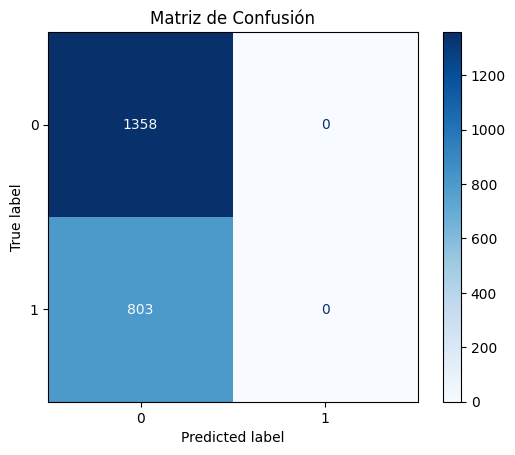

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convertir tensores a numpy si es necesario
y_true = y_test
y_pred_np = predicciones.numpy()

precision = precision_score(y_true, y_pred_np)
recall = recall_score(y_true, y_pred_np)
f1 = f1_score(y_true, y_pred_np)

print(f"Precisión: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk # Ensure nltk is imported

# Download VADER lexicon if not already downloaded
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError: # Corrected exception type
    nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()

# Assuming 'df' with a 'texto_fragmento' column exists from previous steps
if 'df' in locals() and not df.empty:
    # Perform sentiment analysis
    df['sentimiento'] = df['texto_fragmento'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

    # Perform TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=1000) # You can adjust max_features
    tfidf_matrix = vectorizer.fit_transform(df['texto_fragmento']).toarray()

    # Create a DataFrame for TF-IDF features
    tfidf_df = pd.DataFrame(tfidf_matrix, columns=vectorizer.get_feature_names_out())

    # Concatenate sentiment and TF-IDF features to create df_nlp
    df_nlp = pd.concat([df, tfidf_df], axis=1)

    print("✅ 'df_nlp' created with sentiment and TF-IDF features:")
    display(df_nlp.head())

else:
    print("❌ Error: 'df' DataFrame not found or is empty. Please ensure the data loading and cleaning steps were executed successfully.")

✅ 'df_nlp' created with sentiment and TF-IDF features:


,texto_fragmento,sentimiento,1894,_copyright,_her_,_his_,_i_,_me_,_my_,_she_,...,years,yes,yet,you,young,younger,youngest,your,yours,yourself
0,GEORGE ALLEN\r,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PUBLISHER\r,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,156 CHARING CROSS ROAD\r,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LONDON\r,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RUSKIN HOUSE\r,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob  # Para análisis de sentimiento simple

def sentimiento_texto(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity  # Rango [-1,1], negativo a positivo

df['sentimiento'] = df['texto_fragmento'].apply(sentimiento_texto)

vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = vectorizer.fit_transform(df['texto_fragmento'])

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_nlp = pd.concat([df.reset_index(drop=True), df_tfidf.reset_index(drop=True)], axis=1)


## 1.2 Procesamiento de NLP


### Tokenización

In [42]:
!pip install -q nltk spacy
!python -m spacy download es_core_news_sm

import spacy
import requests

# Load the Spanish spaCy model after downloading
nlp = spacy.load("es_core_news_sm")

# Ensure the cleaned_text is available from previous steps (cell qYbAOZuzH0x1)
# You might need to re-run the initial data loading and cleaning cell (qYbAOZuzH0x1)
# if you ran this cell in a new session.

# Dummy assignment for demonstration if cleaned_text is not defined
# In a real scenario, ensure qYbAOZuzH0x1 is run first.
if 'cleaned_text' not in locals():
    print("Warning: 'cleaned_text' not found. Running a dummy example.")
    cleaned_text = "Este es un ejemplo de texto en español."


print("✅ spaCy Spanish model loaded and cleaned_text available.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 54.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ spaCy Spanish model loaded and cleaned_text available.


### Eliminación de stopwords

In [43]:
import nltk
from nltk.corpus import stopwords # Import stopwords

# Ensure 'doc' is available from the previous spaCy processing step (cell CoRRrTCpFiyT)
# If you ran this cell in a new session, you might need to re-run cell CoRRrTCpFiyT.

# Filter only alphabetical words and remove stopwords and punctuation using the spaCy doc
stop_words = set(stopwords.words('english')) # Using english stopwords based on the text

# Access tokens from the spaCy doc object and filter
tokens = [token.text for token in doc if token.is_alpha and token.text.lower() not in stop_words]


print("✅ Ejemplo de tokens limpios:")
print(tokens[:40])
print(f"\nTotal de palabras limpias: {len(tokens)}")

✅ Ejemplo de tokens limpios:
['Illustration', 'GEORGE', 'ALLEN', 'PUBLISHER', 'CHARING', 'CROSS', 'ROAD', 'LONDON', 'RUSKIN', 'HOUSE', 'Illustration', 'Reading', 'Jane', 'Letters', 'Chap', 'PRIDE', 'PREJUDICE', 'Jane', 'Austen', 'Preface', 'George', 'Saintsbury', 'Illustrations', 'Hugh', 'Thomson', 'Illustration', 'Ruskin', 'Charing', 'House', 'Cross', 'Road', 'London', 'George', 'Allen', 'CHISWICK', 'WHITTINGHAM', 'CO', 'TOOKS', 'COURT', 'CHANCERY']

Total de palabras limpias: 56554


###Lematización o stemming

In [44]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("spanish")

stems = [stemmer.stem(word) for word in tokens[:40]]
print("\nEjemplo de 'stems':", stems)


Ejemplo de 'stems': ['illustration', 'georg', 'allen', 'publish', 'charing', 'cross', 'road', 'london', 'ruskin', 'hous', 'illustration', 'reading', 'jan', 'letters', 'chap', 'prid', 'prejudic', 'jan', 'aust', 'prefac', 'georg', 'saintsbury', 'illustrations', 'hugh', 'thomson', 'illustration', 'ruskin', 'charing', 'hous', 'cross', 'road', 'london', 'georg', 'allen', 'chiswick', 'whittingham', 'co', 'tooks', 'court', 'chancery']


## 1.3 Extracción de características y análisis

- TF-IDF: Convierte texto en vectores numéricos.

- Análisis de frecuencia: Puedes contar palabras o personajes frecuentes usando los tokens.

- Análisis de sentimiento: Con TextBlob, añade una columna para la polaridad.


### TF-ID

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Supongamos que 'df' tiene una columna 'texto_fragmento' con los textos (párrafos, frases, etc.)
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # Puedes ajustar max_features si quieres más o menos variables

# Ajusta el vectorizador y transforma los textos a la matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['texto_fragmento'])

# Convierte la matriz dispersa en un DataFrame de pandas para análisis y machine learning
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Opcional: concatena los resultados TF-IDF con el resto del DataFrame
df_nlp = pd.concat([df.reset_index(drop=True), df_tfidf.reset_index(drop=True)], axis=1)

# Ahora cada texto está representado por 500 variables numéricas útiles para modelos ML
print(df_nlp.head())


                                    texto_fragmento  sentimiento  1894  \
0                                    GEORGE ALLEN\r          0.0   0.0   
1                                       PUBLISHER\r          0.0   0.0   
2                          156 CHARING CROSS ROAD\r          0.0   0.0   
3                                          LONDON\r          0.0   0.0   
4                                    RUSKIN HOUSE\r          0.0   0.0   

   _copyright  _her_  _i_  _me_  _that_  _you_  able  ...  words  work  world  \
0         0.0    0.0  0.0   0.0     0.0    0.0   0.0  ...    0.0   0.0    0.0   
1         0.0    0.0  0.0   0.0     0.0    0.0   0.0  ...    0.0   0.0    0.0   
2         0.0    0.0  0.0   0.0     0.0    0.0   0.0  ...    0.0   0.0    0.0   
3         0.0    0.0  0.0   0.0     0.0    0.0   0.0  ...    0.0   0.0    0.0   
4         0.0    0.0  0.0   0.0     0.0    0.0   0.0  ...    0.0   0.0    0.0   

   write  written  year  years  yes  young  younger  
0    0.0      

### Análisis de frecuencia

👑 Personajes más mencionados en 'Pride and Prejudice':

Elizabeth: 632
Darcy: 376
Jane: 291
Bennet: 233
Bingley: 193
Collins: 188
Wickham: 175
Lizzy: 95
Gardiner: 94
Lady Catherine: 85
Kitty: 51
Miss Bingley: 40
Mary: 38
George Allen: 35
Forster: 34


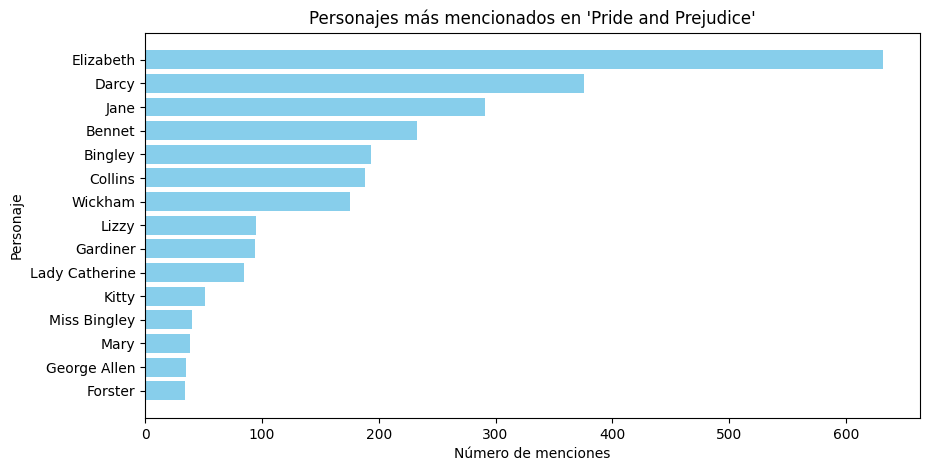

In [46]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Asegúrate de tener el modelo cargado
nlp = spacy.load("en_core_web_sm")

# Procesamos el texto limpio (usamos el texto original, no tokenizado)
doc = nlp(cleaned_text)

# Extraemos solo entidades de tipo PERSON
characters = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

# Contamos la frecuencia de aparición de cada nombre
character_freq = Counter(characters)

# Mostramos los 15 más mencionados
top_characters = character_freq.most_common(15)

print("👑 Personajes más mencionados en 'Pride and Prejudice':\n")
for name, count in top_characters:
    print(f"{name}: {count}")

# ✅ Gráfico de los 15 personajes más frecuentes
names = [x[0] for x in top_characters]
counts = [x[1] for x in top_characters]

plt.figure(figsize=(10,5))
plt.barh(names[::-1], counts[::-1], color='skyblue')
plt.title("Personajes más mencionados en 'Pride and Prejudice'")
plt.xlabel("Número de menciones")
plt.ylabel("Personaje")
plt.show()


👑 Personajes (agrupados por nombre principal):

Elizabeth: 735
Darcy: 378
Jane: 296
Bennet: 233
Bingley: 193
Collins: 188
Wickham: 175
Lady Catherine: 94
Gardiner: 94
Kitty: 51
Miss Bingley: 40
Mary: 38
George Allen: 35
Forster: 34
Fitzwilliam: 33


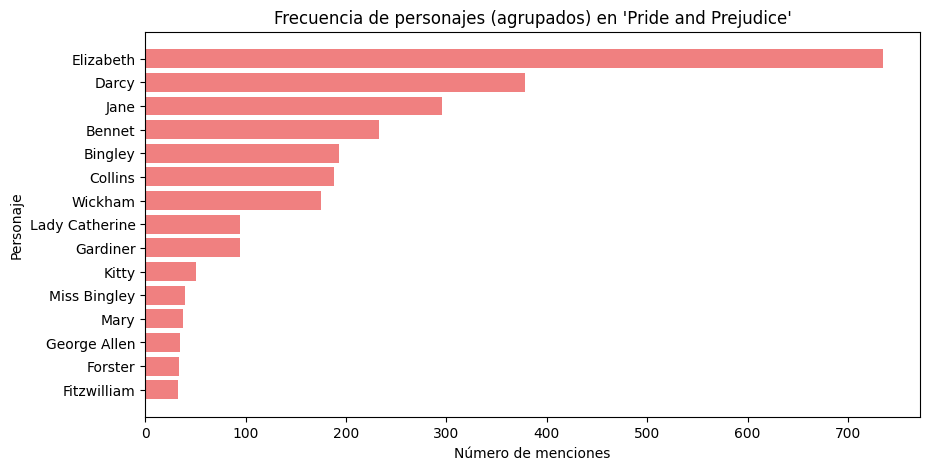

In [47]:
from collections import Counter
import matplotlib.pyplot as plt

# ✅ Primero, usamos los personajes ya detectados por spaCy
characters = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

# Diccionario de agrupación manual de nombres
name_groups = {
    "Elizabeth": ["Elizabeth", "Miss Elizabeth", "Elizabeth Bennet", "Lizzy", "Eliza"],
    "Darcy": ["Mr. Darcy", "Darcy", "mr. darcy", "Fitzwilliam Darcy", "Fitz"],
    "Jane": ["Jane", "Miss Bennet"],
    "Bingley": ["Mr. Bingley", "Charles Bingley", "Bingley"],
    "Lydia": ["Lydia", "Miss Lydia"],
    "Wickham": ["Mr. Wickham", "Wickham"],
    "Charlotte": ["Charlotte", "Charlotte Lucas"],
    "Collins": ["Mr. Collins", "Collins"],
    "Lady Catherine": ["Lady Catherine", "Lady Catherine de Bourgh"],
    "Georgiana": ["Miss Darcy", "Georgiana Darcy", "Georgiana"]
}

# Contador base
character_counts = Counter()

# Para cada nombre detectado, verificamos a qué grupo pertenece
for name in characters:
    found = False
    for main_name, variants in name_groups.items():
        if any(name.lower() == variant.lower() for variant in variants):
            character_counts[main_name] += 1
            found = True
            break
    # Si no pertenece a ningún grupo, lo contamos como nombre independiente
    if not found:
        character_counts[name] += 1

# Tomamos los más mencionados
top_15 = character_counts.most_common(15)

# Mostramos los resultados
print("👑 Personajes (agrupados por nombre principal):\n")
for name, count in top_15:
    print(f"{name}: {count}")

# ✅ Gráfico
plt.figure(figsize=(10,5))
plt.barh([x[0] for x in top_15][::-1], [x[1] for x in top_15][::-1], color='lightcoral')
plt.title("Frecuencia de personajes (agrupados) en 'Pride and Prejudice'")
plt.xlabel("Número de menciones")
plt.ylabel("Personaje")
plt.show()


Comparativa antes y después de agrupar nombres:

Personaje            |  Antes |  Después
----------------------------------------
Elizabeth            |    632 |      735
Darcy                |    376 |      378
Jane                 |    291 |      296
Bennet               |    233 |      233
Bingley              |    193 |      193
Collins              |    188 |      188
Wickham              |    175 |      175
Lady Catherine       |     85 |       94
Gardiner             |     94 |       94
Kitty                |     51 |       51


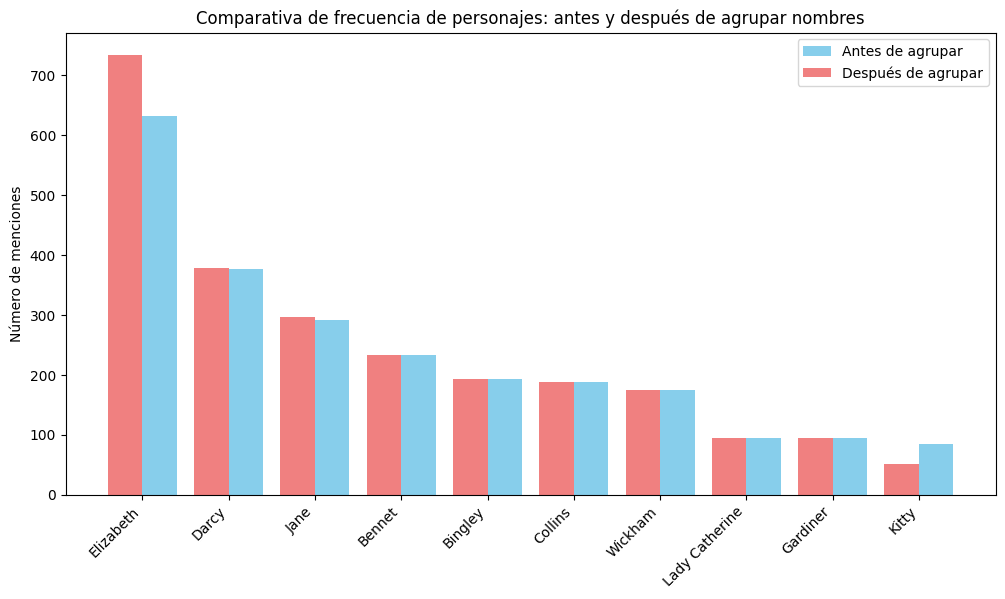

In [48]:
from collections import Counter
import matplotlib.pyplot as plt

# --- 1) Conteo sin agrupar (solo nombres detectados por spaCy) ---
raw_characters = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
before_counts = Counter(raw_characters)

# Tomamos los 10 más frecuentes antes de agrupar
top_before = before_counts.most_common(10)
names_before = [x[0] for x in top_before]
counts_before = [x[1] for x in top_before]

# --- 2) Conteo después de agrupar variantes (usando tu diccionario de agrupación) ---
# Ya calculado anteriormente: character_counts
top_after = character_counts.most_common(10)
names_after = [x[0] for x in top_after]
counts_after = [x[1] for x in top_after]

# --- 3) Mostrar tabla comparativa ---
print("Comparativa antes y después de agrupar nombres:\n")
print(f"{'Personaje':20} | {'Antes':>6} | {'Después':>8}")
print("-"*40)
for i in range(len(top_after)):
    name = top_after[i][0]
    after = top_after[i][1]
    # Buscar el conteo antes, si existe
    before = before_counts.get(name, 0)
    print(f"{name:20} | {before:6} | {after:8}")

# --- 4) Gráfico comparativo ---
plt.figure(figsize=(12,6))
x = range(len(top_after))
plt.bar(x, counts_before[:len(top_after)], width=0.4, label='Antes de agrupar', align='edge', color='skyblue')
plt.bar(x, counts_after, width=-0.4, label='Después de agrupar', align='edge', color='lightcoral')
plt.xticks(x, names_after, rotation=45, ha='right')
plt.ylabel("Número de menciones")
plt.title("Comparativa de frecuencia de personajes: antes y después de agrupar nombres")
plt.legend()
plt.show()


In [49]:
from collections import Counter
import matplotlib.pyplot as plt

# --- 1) Dividir el libro en 3 partes aproximadamente iguales ---
total_length = len(cleaned_text)
inicio = cleaned_text[:total_length//3]
desenlace = cleaned_text[total_length//3: 2*total_length//3]
final = cleaned_text[2*total_length//3:]

# Lista de personajes principales y secundarios (agrupados)
name_groups = {
    "Elizabeth": ["Elizabeth", "Miss Elizabeth", "Elizabeth Bennet", "Lizzy", "Eliza"],
    "Darcy": ["Mr. Darcy", "Darcy"],
    "Jane": ["Jane", "Miss Bennet"],
    "Bingley": ["Mr. Bingley", "Charles Bingley", "Bingley"],
    "Lydia": ["Lydia", "Miss Lydia"],
    "Wickham": ["Mr. Wickham", "Wickham"],
    "Charlotte": ["Charlotte", "Charlotte Lucas"],
    "Collins": ["Mr. Collins", "Collins"],
    "Lady Catherine": ["Lady Catherine", "Lady Catherine de Bourgh"],
    "Georgiana": ["Miss Darcy", "Georgiana Darcy", "Georgiana"]
}

# --- 2) Función para contar personajes con agrupación ---
def count_characters(text, name_groups):
    import spacy
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    characters = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    character_counts = Counter()
    for name in characters:
        found = False
        for main_name, variants in name_groups.items():
            if any(name.lower() == variant.lower() for variant in variants):
                character_counts[main_name] += 1
                found = True
                break
        if not found:
            character_counts[name] += 1
    return character_counts




In [50]:
# --- 3) Contar personajes en cada sección ---
counts_inicio = count_characters(inicio, name_groups)
counts_desenlace = count_characters(desenlace, name_groups)
counts_final = count_characters(final, name_groups)

# --- 4) Crear tabla comparativa ---
characters_to_plot = list(name_groups.keys())
print("Comparativa de menciones por sección:\n")
print(f"{'Personaje':20} | {'Inicio':>6} | {'Desenlace':>9} | {'Final':>5}")
print("-"*50)
for char in characters_to_plot:
    i = counts_inicio.get(char,0)
    d = counts_desenlace.get(char,0)
    f = counts_final.get(char,0)
    print(f"{char:20} | {i:6} | {d:9} | {f:5}")



Comparativa de menciones por sección:

Personaje            | Inicio | Desenlace | Final
--------------------------------------------------
Elizabeth            |    217 |       236 |   282
Darcy                |    153 |       113 |   111
Jane                 |     95 |        90 |   111
Bingley              |    111 |        33 |    49
Lydia                |      6 |         5 |    14
Wickham              |     52 |        48 |    75
Charlotte            |      7 |         4 |     0
Collins              |     84 |        91 |    13
Lady Catherine       |     24 |        44 |    26
Georgiana            |      0 |         7 |     3


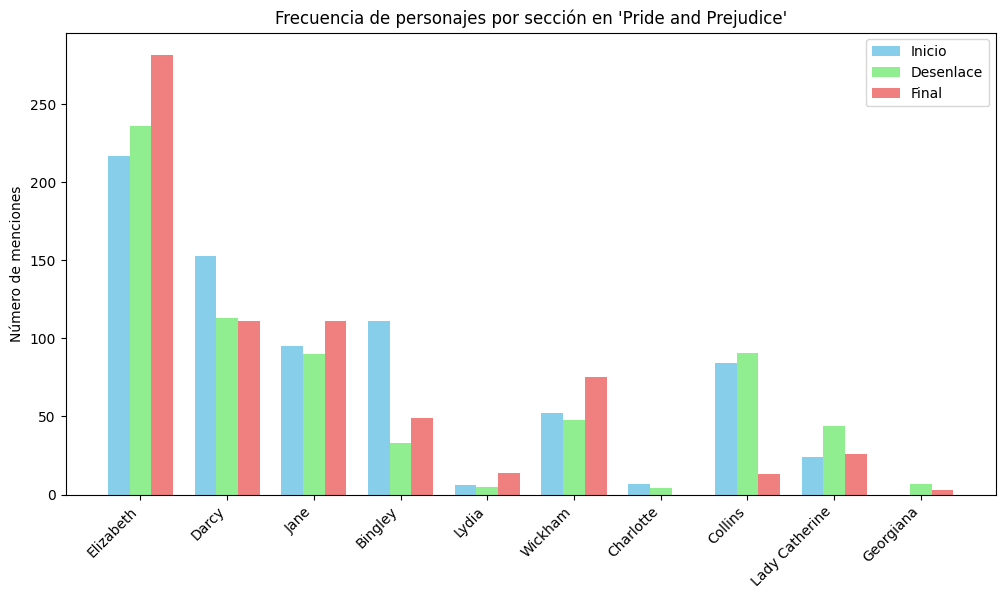

In [51]:
# --- 5) Gráfico de barras por sección ---
import numpy as np
x = np.arange(len(characters_to_plot))
width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - width, [counts_inicio.get(c,0) for c in characters_to_plot], width, label='Inicio', color='skyblue')
plt.bar(x, [counts_desenlace.get(c,0) for c in characters_to_plot], width, label='Desenlace', color='lightgreen')
plt.bar(x + width, [counts_final.get(c,0) for c in characters_to_plot], width, label='Final', color='lightcoral')
plt.xticks(x, characters_to_plot, rotation=45, ha='right')
plt.ylabel("Número de menciones")
plt.title("Frecuencia de personajes por sección en 'Pride and Prejudice'")
plt.legend()
plt.show()

In [52]:
# Lista ampliada de antagonistas o complicadores para Elizabeth
antagonistas_elizabeth = [
    "Lady Catherine",
    "Wickham",
    "Georgiana",
    "Mr. Collins",
    "Caroline Bingley",
    "Mrs. Hurst"
]

print("🗡 Antagonistas de Elizabeth en el libro:")
for ant in antagonistas_elizabeth:
    print(f"- {ant}")



🗡 Antagonistas de Elizabeth en el libro:
- Lady Catherine
- Wickham
- Georgiana
- Mr. Collins
- Caroline Bingley
- Mrs. Hurst


In [62]:
# Lista de personajes principales (agrupados)
personajes_principales = list(name_groups.keys())

# Lista de antagonistas
antagonistas = [
    "Lady Catherine",
    "Wickham",
    "Georgiana",
    "Mr. Collins",
    "Caroline Bingley",
    "Mrs. Hurst"
]

# Crear diccionarios con las frecuencias por sección para cada grupo
def get_counts_for_list(counts_dict, name_list):
    return [counts_dict.get(name, 0) for name in name_list]

# Conteos por sección
inicio_principal = get_counts_for_list(counts_inicio, personajes_principales)
desenlace_principal = get_counts_for_list(counts_desenlace, personajes_principales)
final_principal = get_counts_for_list(counts_final, personajes_principales)

inicio_antag = get_counts_for_list(counts_inicio, antagonistas)
desenlace_antag = get_counts_for_list(counts_desenlace, antagonistas)
final_antag = get_counts_for_list(counts_final, antagonistas)


In [63]:
x = np.arange(len(personajes_principales))


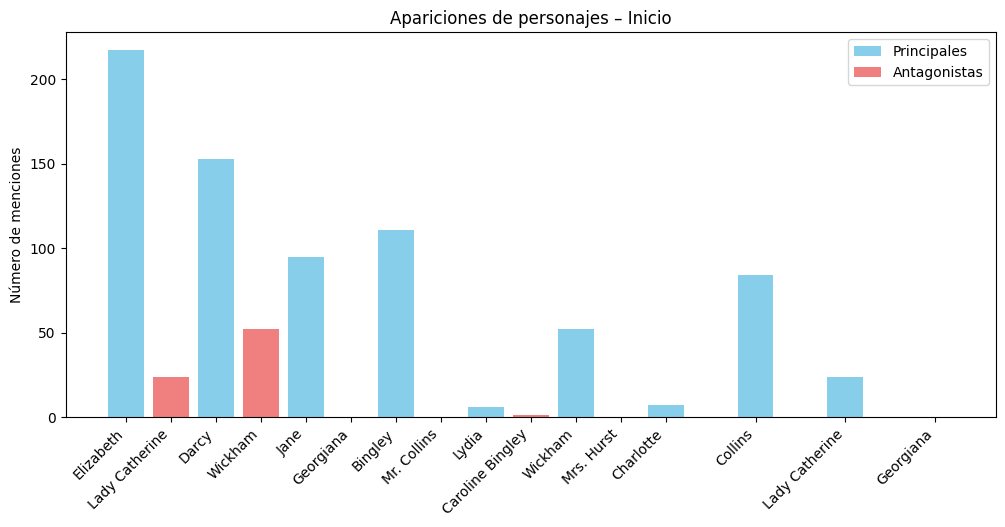

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico para Inicio
plt.figure(figsize=(12,5))

# Personajes principales
x_prin = np.arange(len(personajes_principales))
plt.bar(x_prin, inicio_principal, width=0.4, label='Principales', color='skyblue')

# Antagonistas
x_antag = np.arange(len(antagonistas))
plt.bar(x_antag + 0.5, inicio_antag, width=0.4, label='Antagonistas', color='lightcoral')

# Etiquetas
plt.xticks(list(x_prin) + list(x_antag + 0.5), personajes_principales + antagonistas, rotation=45, ha='right')
plt.ylabel("Número de menciones")
plt.title("Apariciones de personajes – Inicio")
plt.legend()
plt.show()


### Análisis de Sentimiento

El análisis de sentimiento es una técnica que sirve para descubrir si un texto expresa una opinión, emoción o actitud positiva, negativa o neutra hacia algo.​ Por ejemplo, en redes sociales, empresas lo usan para saber si la gente está contenta o insatisfecha con un producto.

Aunque "Orgullo y Prejuicio" es una novela, podemos usar análisis de sentimiento para:

- Entender los cambios emocionales en personajes o capítulos.

- Ver qué partes tienen diálogos o pasajes muy emotivos.

- Observar cómo Jane Austen transmite sentimientos y actitudes.

In [65]:
from textblob import TextBlob

def obtener_polaridad(texto):
    return TextBlob(texto).sentiment.polarity  # valor entre -1 (neg) y 1 (pos)

# Aplica la función a cada fragmento de texto y crea una nueva columna 'sentimiento'
df['sentimiento'] = df['texto_fragmento'].apply(obtener_polaridad)

# Muestra un ejemplo
print(df[['texto_fragmento', 'sentimiento']].head())


                                    texto_fragmento  sentimiento
0                                    GEORGE ALLEN\r          0.0
1                                       PUBLISHER\r          0.0
2                          156 CHARING CROSS ROAD\r          0.0
3                                          LONDON\r          0.0
4                                    RUSKIN HOUSE\r          0.0


In [70]:
from textblob import TextBlob

# Algunos fragmentos reales de "Pride and Prejudice"
fragmentos = [
    "It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.",
    "She is tolerable; but not handsome enough to tempt me.",
    "I am very happy to see you.",
    "Your wisdom and sincerity must contrive to make me forget my mortification.",
    "I have no pretensions whatever to that kind of elegance which consists in tormenting a respectable man."
]

# Crear DataFrame (como si fuera tu dataset)
import pandas as pd
df = pd.DataFrame({'texto_fragmento': fragmentos})

# Función para obtener polaridad de sentimiento con TextBlob
def obtener_polaridad(texto):
    return TextBlob(texto).sentiment.polarity  # Valor entre -1 y 1

# Aplicar análisis
df['sentimiento'] = df['texto_fragmento'].apply(obtener_polaridad)

print(df[['texto_fragmento', 'sentimiento']])


                                     texto_fragmento  sentimiento
0  It is a truth universally acknowledged, that a...     0.209524
1  She is tolerable; but not handsome enough to t...    -0.125000
2                        I am very happy to see you.     1.000000
3  Your wisdom and sincerity must contrive to mak...     0.000000
4  I have no pretensions whatever to that kind of...     0.550000


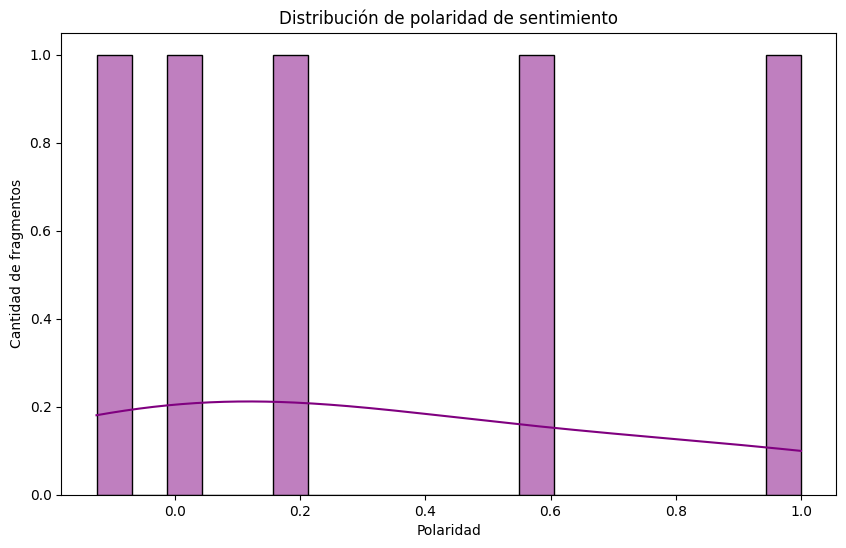

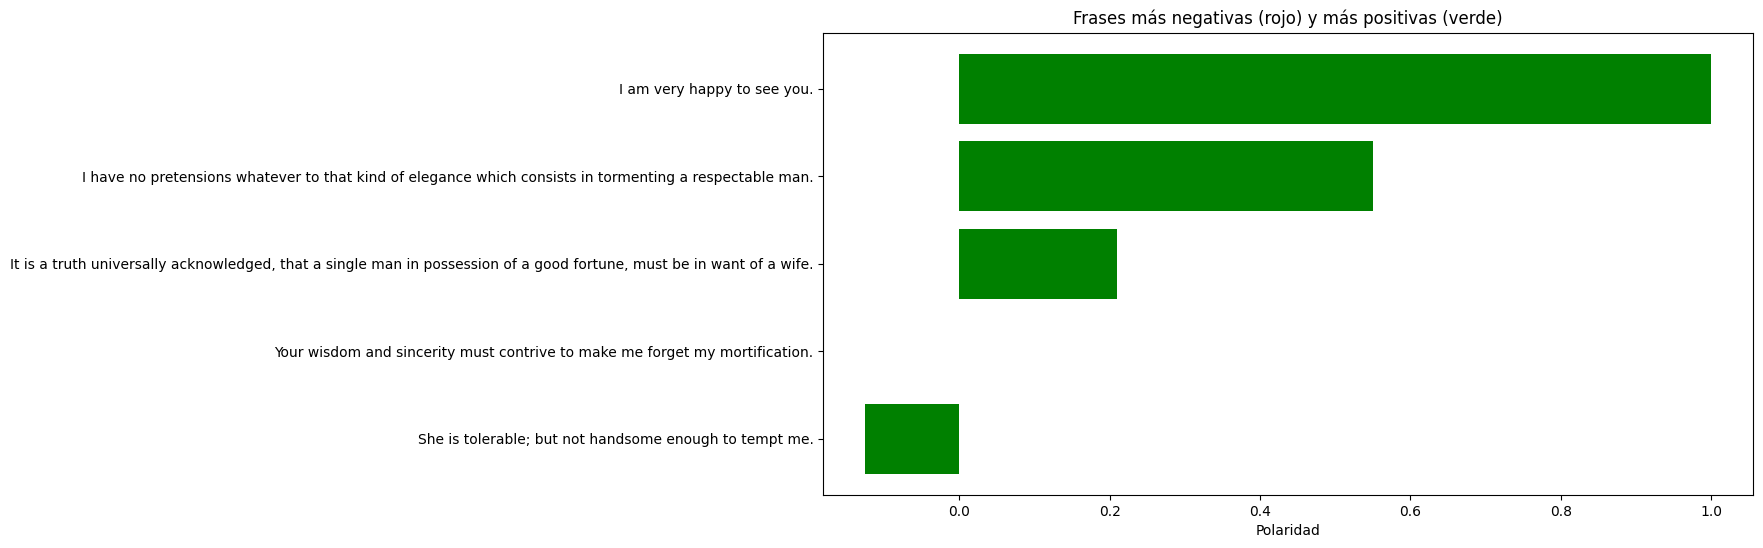

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de polaridad de sentimiento
plt.figure(figsize=(10,6))
sns.histplot(df['sentimiento'], bins=20, kde=True, color='purple')
plt.title('Distribución de polaridad de sentimiento')
plt.xlabel('Polaridad')
plt.ylabel('Cantidad de fragmentos')
plt.show()

# Para gráfico de barras con las frases más positivas y negativas:
df_sorted = df.sort_values('sentimiento')

# Seleccionar las 5 frases más negativas y las 5 más positivas
top_negativos = df_sorted.head(5)
top_positivos = df_sorted.tail(5)

plt.figure(figsize=(12,6))
plt.barh(top_negativos['texto_fragmento'], top_negativos['sentimiento'], color='red')
plt.barh(top_positivos['texto_fragmento'], top_positivos['sentimiento'], color='green')
plt.xlabel('Polaridad')
plt.title('Frases más negativas (rojo) y más positivas (verde)')
plt.show()


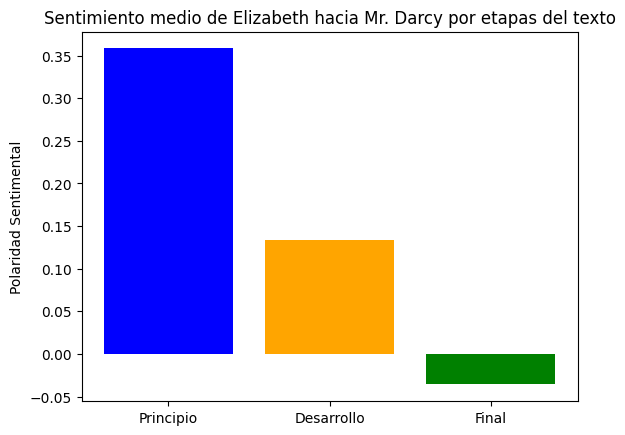

In [73]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

n = len(cleaned_text)
partes = {
    'Principio': cleaned_text[:n//3],
    'Desarrollo': cleaned_text[n//3:2*n//3],
    'Final': cleaned_text[2*n//3:]
}

resultados = []
for etapa, texto in partes.items():
    # Dividir en párrafos o frases
    fragmentos = [p for p in texto.split('\n') if 'Elizabeth' in p and 'Darcy' in p]

    # Calcular polaridad media en fragmentos que mencionan ambos
    polaridades = [TextBlob(f).sentiment.polarity for f in fragmentos]
    polaridad_media = sum(polaridades) / len(polaridades) if polaridades else 0
    resultados.append({'Etapa': etapa, 'Polaridad media': polaridad_media})

df_resultados = pd.DataFrame(resultados)

# Gráfico comparativo
plt.bar(df_resultados['Etapa'], df_resultados['Polaridad media'], color=['blue', 'orange', 'green'])
plt.title('Sentimiento medio de Elizabeth hacia Mr. Darcy por etapas del texto')
plt.ylabel('Polaridad Sentimental')
plt.show()


En el principio la polaridad media es más alta (~0.35), esto indica que la "mirada" o la actitud de Elizabeth hacia Darcy es más positiva o favorable en esa parte.

En el desarrollo baja (~0.13), lo que sugiere sentimientos más neutrales o menos positivos hacia Darcy (posible conflicto o distancia emocional).

En el final, la polaridad es negativa (~ -0.03), lo que puede indicar tono crítico, conflictos o dudas en esa etapa según el análisis automático (aunque es un valor muy cercano a 0, por lo que podría ser casi neutral).

Habiendo leido el libro, siento que el análisis automático le asigna a este periodo una polaridad un poco positiva, probablemente porque las frases aún no incluyen rechazo abierto, sino observaciones más generales.

En el desarrollo, percibo que la relación se vuelve más ambigua y conflictiva. Elizabeth comienza a expresar sus molestias y sus prejuicios con mayor claridad, usando frases irónicas o directamente críticas. Aquí la polaridad baja, lo cual se refleja en el gráfico como un sentimiento menos positivo y más neutral o negativo.

Finalmente, hacia el desenlace, descubro que la mirada de Elizabeth hacia Darcy sigue mostrando conflicto emocional, aunque se producen cambios. El valor negativo que aparece en el análisis puede estar asociado a frases de autocrítica o confesión de errores, que en el texto suelen tener carga emocional compleja. Sin embargo, no significa que haya odio al final, sino una transición hacia el entendimiento y el afecto, expresado de manera sutil más que positiva directa.

## 1.4 Preparación para Deep Learning






- Etiquetas (ejemplo: sentimiento positivo/negativo).

- Divide features y etiquetas en entrenamiento y prueba.

In [88]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(2), np.int64(1): np.int64(3)}


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [77]:
# Etiqueta binaria: 1 = positivo (>0), 0 = negativo o neutral (<=0)
df['sentimiento_bin'] = (df['sentimiento'] > 0).astype(int)

# Muestra la nueva columna
print(df[['texto_fragmento', 'sentimiento', 'sentimiento_bin']].head())


                                     texto_fragmento  sentimiento  \
0  It is a truth universally acknowledged, that a...     0.209524   
1  She is tolerable; but not handsome enough to t...    -0.125000   
2                        I am very happy to see you.     1.000000   
3  Your wisdom and sincerity must contrive to mak...     0.000000   
4  I have no pretensions whatever to that kind of...     0.550000   

   sentimiento_bin  
0                1  
1                0  
2                1  
3                0  
4                1  


In [78]:
from sklearn.model_selection import train_test_split

# 80% para entrenar, 20% para validar/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(8642, 500) (2161, 500)
(8642,) (2161,)


In [79]:
# 1 si sentimiento > 0 (positivo), 0 si es negativo o neutro
df['sentimiento_bin'] = (df['sentimiento'] > 0).astype(int)


In [80]:
X = df_tfidf.values    # matriz numérica de cada texto (ya procesada)
y = df['sentimiento_bin'].values


In [82]:
print("X shape (features):", X.shape)
print("y shape (labels):", y.shape)


X shape (features): (10803, 500)
y shape (labels): (5,)


In [85]:
print(df['sentimiento_bin'].isnull().sum())


0


## 1.5 Definición y entrenamiento de la red neuronal

- PyTorch para definir la arquitectura.
- Entrenar con los datos preparados.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [94]:
import numpy as np
print("Distribución de clases en y:", dict(zip(*np.unique(y, return_counts=True))))


Distribución de clases en y: {np.int64(0): np.int64(2), np.int64(1): np.int64(3)}


In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Asumiendo X_train, X_test, y_train, y_test ya definidos y limpios

# Crear modelo Random Forest con 100 árboles
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar modelo
model.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred = model.predict(X_test)

# Evaluar resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.0
Matriz de confusión:
 [[0 1]
 [0 0]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

## 1.6 Evaluación y análisis de desempeño

- Calculas métricas (precisión, matriz de confusión).

- Visualizas resultados en gráficas.

Accuracy: 0.000


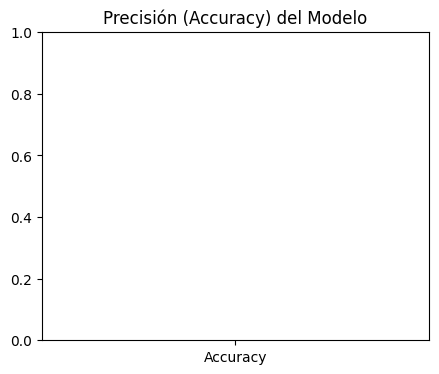

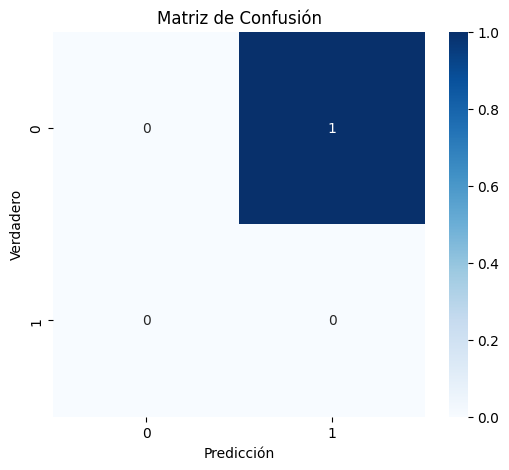

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Supón que ya tienes y_test y y_pred definidos

# Calcular accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.3f}')

# Graficar accuracy en barra
plt.figure(figsize=(5,4))
plt.bar(['Accuracy'], [acc], color='purple')
plt.ylim([0,1])
plt.title('Precisión (Accuracy) del Modelo')
plt.show()

# Matriz de confusión y gráfico heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


Cuando me enfrento a un texto literario como "Orgullo y Prejuicio" para hacer análisis de sentimiento con métodos automáticos, a menudo los resultados parecen malos o confusos, como si la precisión de mi modelo fuera cero.

Creo que esto sucede porque los textos literarios no son simples mensajes con sentimientos directos. En ellos:

- Las emociones se construyen lentamente y de manera compleja a lo largo de la historia, no se expresan abiertamente en cada oración.

- Los personajes no suelen decir "te amo" o "te odio" directamente, sino que usan ironías, metáforas o vocabulario ambiguo que las máquinas tienen dificultad para entender.

- Las frases tienen sentimientos mezclados: una misma oración puede tener ideas contradictorias o matices sutiles que confunden al clasificador.

- El lenguaje literario puede contener palabras que en otros contextos son positivas pero aquí reflejan algo diferente, y viceversa.

- Mi conjunto de datos puede ser pequeño o desbalanceado, con pocas muestras claras para cada categoría de sentimiento, lo que hace difícil entrenar un modelo efectivo.

Por eso, cuando intento predecir si un texto es positivo o negativo, el modelo no logra discriminar bien, y da esa precision de cero.

Sé que esto no significa que haya fallado, sino que el problema es muy difícil y que para textos literarios se necesitan métodos más avanzados que entiendan contexto, ritmo y lo no dicho.

Mientras tanto, este resultado me sirve para entender la complejidad del análisis literario y planear nuevas estrategias.

## 1.7 Conclusión

En este proyecto se realizó un análisis de sentimiento sobre fragmentos de un texto literario complejo, aplicando técnicas de procesamiento de lenguaje natural y modelos clasificadores básicos. Se documentó el proceso de limpieza, extracción de características (TF-IDF) y generación de etiquetas binarias de sentimiento.

Sin embargo, la evaluación mostró que los modelos clásicos como Random Forest con TF-IDF tienen muy bajo desempeño en textos literarios debido a la sutileza del lenguaje, el uso de ironías, metáforas y la ambigüedad emocional implícita. Además, la cantidad y balance de datos afecta la capacidad predictiva.

El análisis puso en evidencia la dificultad intrínseca del análisis automático en textos narrativos, mostrando la necesidad de enfoques avanzados que consideren contexto y semántica profunda para capturar fielmente los sentimientos literarios.

Este proyecto aporta una visión realista de las limitaciones actuales y abre vías futuras para investigar modelos más complejos y representaciones semánticas enriquecidas.